# Data Science Regression Project- Predicting Home Prices in Banglore

   #### Dataset is Downloaded from here https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## Data reading from a dataset and loading into a DataFrame

In [2]:
df1= pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [4]:
df1.shape

(13320, 9)

## Droping irrelevant features from Dataframe

In [5]:
df2= df1.drop(['availability','society','area_type','balcony'], axis= 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.shape

(13320, 5)

## Data Cleaning : Handling NA values

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3= df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Feature Engineering 

##### adding new feature int for bhk column (Bedroom hall kitchen) 
###### (as we have different parameters in size feature so we converting information into a single format)

In [12]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3['bhk'].unique()

<ipython-input-12-9e0bf55b3f54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### As we seen total_sqft feature has a range(2100-2850) so we have to take average of the min max values of range and also there are some other unit parameters also there so keep things simpler we drop that values from dataset

In [15]:
def convert_sqft_to_num(x):
    tokens= x.split('-')
    if len(tokens)== 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df4= df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(4)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3


In [17]:
df4.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [18]:
df5= df4.copy()
df5['price_per_sqft']=(df5['price']*100000)/df5['total_sqft']
df5.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#### we are adding a new column named price_per_sqft

In [19]:
df5_stats= df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [20]:
df5['location']= df5['location'].apply(lambda x: x.strip())
location_stats= df5['location'].value_counts(ascending= False)
location_stats

Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
Gulakamale                     1
Indiranagar HAL 2nd Stage      1
7th Block Koramangala          1
sarjapura main road            1
Prestige Sunrise               1
Name: location, Length: 1293, dtype: int64

#### for location we have huge number of values so we are going to apply dimensionality reduction here to reduce number of location

In [21]:
location_stats.values.sum()

13246

In [22]:
len(location_stats[location_stats>10])

241

In [23]:
len(location_stats[location_stats<10])

1039

## Dimensionality Reduction

#### we are categorizing location which have less than 10 data points should be tagged as 'Others'
#### It will reduce number of location by huge amount and it will helpful to do One Hot Encoding to get dummy variables

In [24]:
location_stats_less_than_10= location_stats[location_stats<=10]
location_stats_less_than_10

Ganga Nagar                  10
1st Block Koramangala        10
Nagappa Reddy Layout         10
Basapura                     10
Naganathapura                10
                             ..
Gulakamale                    1
Indiranagar HAL 2nd Stage     1
7th Block Koramangala         1
sarjapura main road           1
Prestige Sunrise              1
Name: location, Length: 1052, dtype: int64

In [25]:
df5['location']=df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
df5['location'].nunique()

242

In [26]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Removal

#### As a Data Scientist we will having conversation with the client that what will be the average room size per sqft, so lets say we consider a avg. room size as 300(i.e 2BHK flat will be 600 sqft). so if one 2BHK flat we get as 400sqft it will be consider suscpicious and it will be removed as an Outlier. we will consider a threshold of 300 sqft for a avg room size anyhing below that consider as an outlier.

In [27]:
df5[df5['total_sqft']/df5['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [28]:
df5.shape

(13246, 7)

In [29]:
df6= df5[~(df5['total_sqft']/df5['bhk']<300)]
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
df6.shape

(12502, 7)

### Outlier Removal using Mean and Standard Deviation

In [31]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find out minimum price is 267rs. per sqft and max is 176470rs. per sqft. so there is a huge variation in property prices, we should remove outliers using mean and standard deviation

In [32]:
def remove_outliers(df):
    df_out= pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out= pd.concat([reduced_df,df_out], ignore_index= True)
    return df_out
df7=remove_outliers(df6)
df7.shape


(10241, 7)

In [33]:
df6['location'].head(10)

0     Electronic City Phase II
1             Chikka Tirupathi
2                  Uttarahalli
3           Lingadheeranahalli
4                     Kothanur
5                   Whitefield
6             Old Airport Road
7                 Rajaji Nagar
8                 Marathahalli
10                  Whitefield
Name: location, dtype: object

## Data Visualization

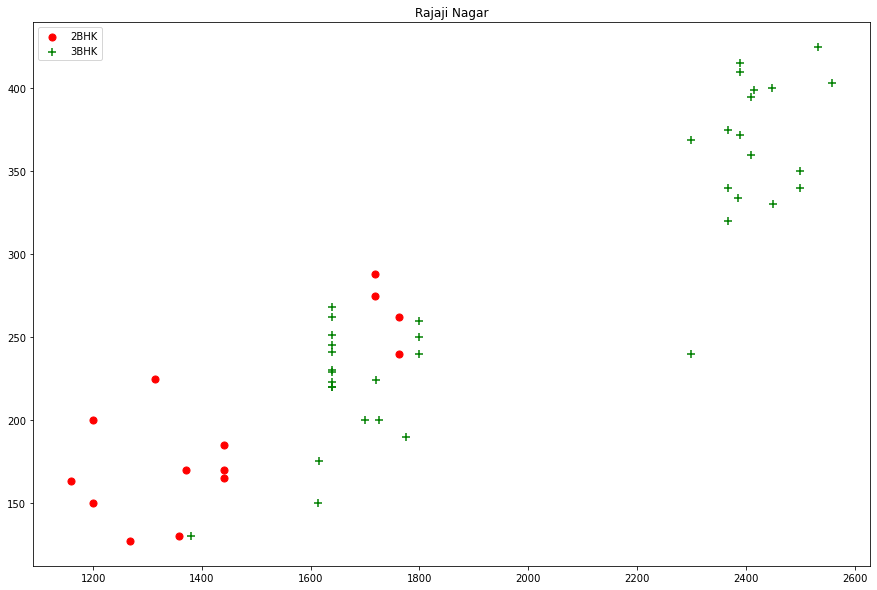

In [34]:
def plot_scatter_chart(df,location):
    bhk2= df[(df.location==location) & (df.bhk==2)]
    bhk3= df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color='red', label='2BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, marker='+',color='green', label='3BHK',s=50)
    plt.xlabel=('Total square feet area')
    plt.ylabel=('Price(in Lakhs Rupees)')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, 'Rajaji Nagar' )

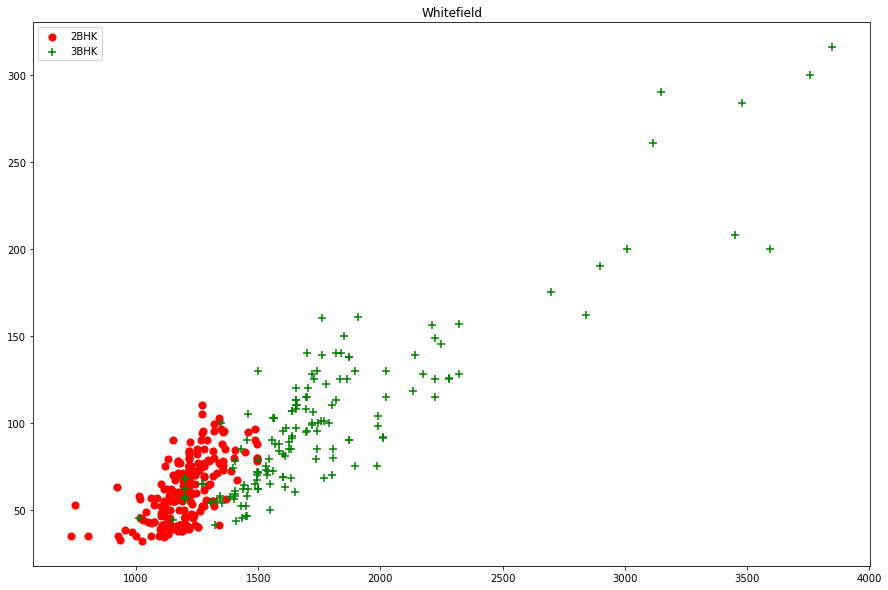

In [35]:
plot_scatter_chart(df7, 'Whitefield' )

### As we seen the 2 BHK and 3BHK flats in same location having same price so we creates a function of BHK outlier to remove that error

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

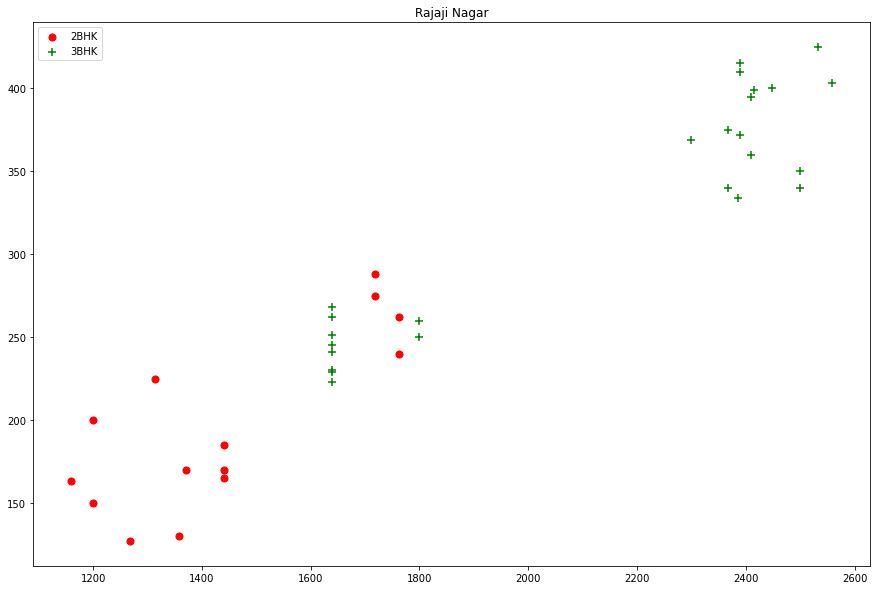

In [37]:
plot_scatter_chart(df8,"Rajaji Nagar")

### Now it has improved data points than previous results but it cannot remove outliers completely

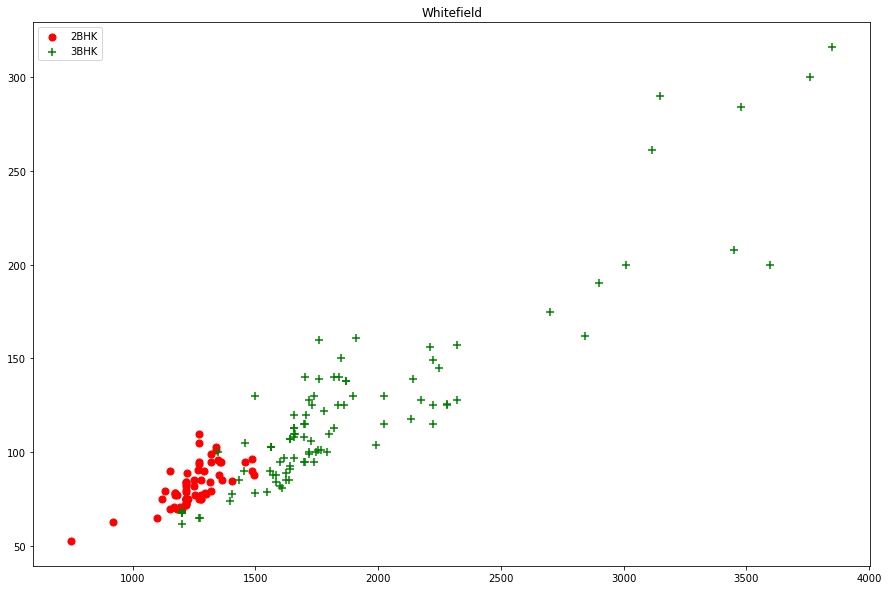

In [38]:
plot_scatter_chart(df8,"Whitefield")

In [39]:
df8.bath.unique()

array([ 4.,  1.,  2.,  3.,  8.,  9.,  5.,  6., 12., 16.,  7., 13.])

## Outlier Removal using Bath feature

In [40]:
df8[df8.bath>10]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
546,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
635,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
1368,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
1699,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
4968,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


In [41]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
471,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
3662,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
5002,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
8612,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520


In [42]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [43]:
df9.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,3 BHK,2770.0,4.0,290.0,3,10469.314079
3,other,1 BHK,600.0,1.0,38.0,1,6333.333333
6,other,2 BHK,1500.0,2.0,185.0,2,12333.333333


In [44]:
df10= df9.drop(['size','price_per_sqft'], axis= 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,other,2770.0,4.0,290.0,3
3,other,600.0,1.0,38.0,1
6,other,1500.0,2.0,185.0,2
7,other,840.0,2.0,45.0,2
8,other,4395.0,3.0,240.0,3


### Applied One Hot Encoding for Dummy Variables on location

In [45]:
dummies= pd.get_dummies(df10['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(4)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,other,2770.0,4.0,290.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,other,600.0,1.0,38.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,other,1500.0,2.0,185.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,other,840.0,2.0,45.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df12= df11.drop('location', axis='columns')
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4.0,290.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,1.0,38.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1500.0,2.0,185.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df12.shape

(7251, 245)

In [49]:
X= df12.drop('price', axis= 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1500.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,840.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4395.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
len(X)

7251

In [51]:
y= df12['price']
y.head(3)

0    290.0
3     38.0
6    185.0
Name: price, dtype: float64

In [52]:
len(y)

7251

### Splitting the Data into training and testing 

In [53]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=10)

In [54]:
X_train.shape

(5800, 244)

In [55]:
X_test.shape

(1451, 244)

In [56]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [57]:
model.fit(X_train, y_train)

LinearRegression()

In [58]:
model.score(X_train, y_train)

0.8521937712111806

## Using k-cross fold validation to measure accuracy of linear model

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [60]:
cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv )

array([0.8607548 , 0.79661644, 0.85504738, 0.83520471, 0.8512822 ])

## Test the Model on some properties

In [61]:
def predict_price(location, sqft, bath, bhk):
    loc_index= np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    
    if loc_index >=0:
        x[loc_index]= 1
        
    return model.predict([x])[0]

In [62]:
predict_price('Whitefield',1170,2.0,2)

67.99656836206096

In [63]:
predict_price('Yelahanka New Town',1400,3.0,3)

91.0391979128029

## Export the model into pickle file

In [64]:
import pickle
with open('Banglore_home_price_model.pickle','wb') as f:
    pickle.dump(model, f)

## Export Location and Column info. in a json file for use in prediction application

In [65]:
import json 
columns={
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))